In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 as sql
import matplotlib.pyplot as plt
import re
import os

In [28]:
tennis_stockholm = pd.read_csv("/Users/siljevik/tennis_stockholm_2024.csv")
tennis_stockholm.head(4)

,Professional,Tournament,Year,TournamentType,FirstSetWinner,Result
0,Jacob Fearnley,Stockholm Open,2024,ATP 250,1,1
1,Adrian Andreev,Stockholm Open,2024,ATP 250,0,0
2,August Holmgren,Stockholm Open,2024,ATP 250,1,1
3,Lukas Pokorny,Stockholm Open,2024,ATP 250,0,0


In [46]:
# Filtrera för rader där FirstSetWinner är 1
first_set_winners = tennis_stockholm[tennis_stockholm['FirstSetWinner'] == 1].copy()

# Lägg till kolumnen
first_set_winners['FirstSetWinnerWonMatch'] = first_set_winners['FirstSetWinner'] == first_set_winners['Result ']

# Kontrollera distributionen
print("Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):")
print(first_set_winners['FirstSetWinnerWonMatch'].value_counts())

# Beräkna procentandelar
percentage = first_set_winners['FirstSetWinnerWonMatch'].value_counts(normalize=True) * 100

# Skriv ut resultaten
print("\nProcentandel för de som vann första set och också vann matchen:")
print(percentage)

Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):
FirstSetWinnerWonMatch
True     34
False     5
Name: count, dtype: int64

Procentandel för de som vann första set och också vann matchen:
FirstSetWinnerWonMatch
True     87.179487
False    12.820513
Name: proportion, dtype: float64


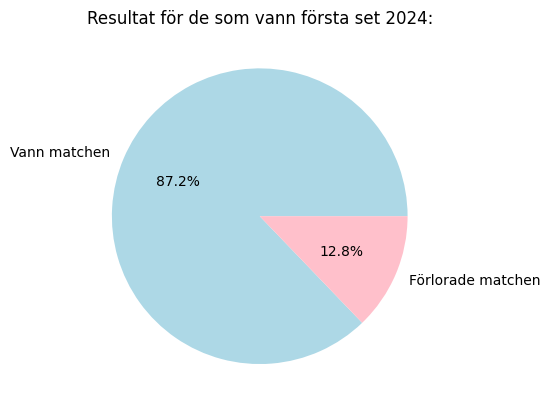

In [16]:
# Plotta cirkeldiagrammet
tennis_stockholm['FirstSetWinnerWonMatch'] =  (tennis_stockholm['FirstSetWinner'] == tennis_stockholm['Result '])
counts = tennis_stockholm['FirstSetWinnerWonMatch'].value_counts(normalize=True)
counts.plot(kind='pie', autopct='%1.1f%%', labels=['Vann matchen', 'Förlorade matchen'], colors=['lightblue', 'pink'])
plt.title('Resultat för de som vann första set 2024:')
plt.ylabel('')
plt.show()

In [17]:
from scipy.stats import chi2_contingency

# Skapa en korsningstabell
contingency_table = pd.crosstab(tennis_stockholm['FirstSetWinner'], tennis_stockholm['Result '])

# Utför Chi2-test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2-statistik: {chi2}")
print(f"P-värde: {p}")

if p < 0.05:
    print("Det finns ett statistiskt signifikant samband mellan att vinna första set och matchen.")
else:
    print("Det finns inget statistiskt signifikant samband.")

Chi2-statistik: 40.205128205128204
P-värde: 2.286472481637791e-10
Det finns ett statistiskt signifikant samband mellan att vinna första set och matchen.


In [15]:
tennis_stockholm_2014 = pd.read_csv("/Users/siljevik/tennis_stockholm_2014.csv")
tennis_stockholm_2014.head(10)

,Professional,Tournament,Year,TournamentType,FirstSetWinner,Result
0,D. Brown,Stockholm Open,2014,ATP 250,1,1
1,C. Lindell,Stockholm Open,2014,ATP 250,0,0
2,P. H. Herbert,Stockholm Open,2014,ATP 250,1,1
3,P. Carreno Busta,Stockholm Open,2014,ATP 250,0,0
4,M. Copil,Stockholm Open,2014,ATP 250,1,1
5,J. Sousa,Stockholm Open,2014,ATP 250,0,0
6,A. Mannarino,Stockholm Open,2014,ATP 250,0,1
7,M. Baghdatis,Stockholm Open,2014,ATP 250,1,0
8,M. Bachinger,Stockholm Open,2014,ATP 250,0,1
9,I. Sijsling,Stockholm Open,2014,ATP 250,1,0


In [47]:
# Filtrera för rader där FirstSetWinner är 1
#first_set_winners = tennis_stockholm_2014[tennis_stockholm_2014['FirstSetWinner'] == 1]

first_set_winners = tennis_stockholm_2014[tennis_stockholm_2014['FirstSetWinner'] == 1].copy()

# Lägg till kolumnen
first_set_winners['FirstSetWinnerWonMatch'] = first_set_winners['FirstSetWinner'] == first_set_winners['Result ']

# Kontrollera distributionen
print("Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):")
print(first_set_winners['FirstSetWinnerWonMatch'].value_counts())

# Beräkna procentandelar
percentage = first_set_winners['FirstSetWinnerWonMatch'].value_counts(normalize=True) * 100

# Skriv ut resultaten
print("\nProcentandel för de som vann första set och också vann matchen:")
print(percentage)

Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):
FirstSetWinnerWonMatch
True     21
False     6
Name: count, dtype: int64

Procentandel för de som vann första set och också vann matchen:
FirstSetWinnerWonMatch
True     77.777778
False    22.222222
Name: proportion, dtype: float64


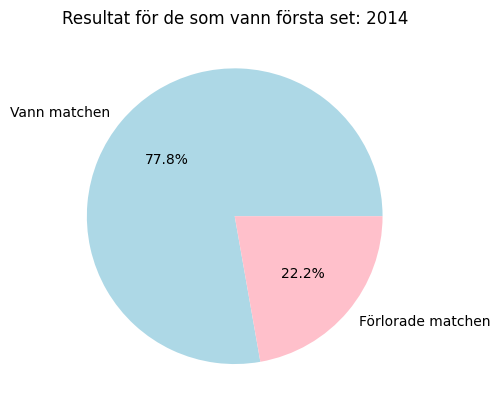

In [13]:
# Plotta cirkeldiagrammet
tennis_stockholm_2014['FirstSetWinnerWonMatch'] =  (tennis_stockholm_2014['FirstSetWinner'] == tennis_stockholm_2014['Result '])
counts = tennis_stockholm_2014['FirstSetWinnerWonMatch'].value_counts(normalize=True)
counts.plot(kind='pie', autopct='%1.1f%%', labels=['Vann matchen', 'Förlorade matchen'], colors=['lightblue', 'pink'])
plt.title('Resultat för de som vann första set: 2014')
plt.ylabel('')
plt.show()

In [16]:
tennis_stockholm_2004 = pd.read_csv("/Users/siljevik/tennis_stockholm_2004.csv")
tennis_stockholm_2004.head(4)

,Professional,Tournament,Year,TournamentType,FirstSetWinner,Result
0,A. Agassi,Stockholm Open,2004,ATP 250,1.0,1.0
1,K. Vliegen,Stockholm Open,2004,ATP 250,0.0,0.0
2,J. Bjorkman,Stockholm Open,2004,ATP 250,0.0,1.0
3,W. Arthurs,Stockholm Open,2004,ATP 250,1.0,0.0


In [24]:
# Filtrera för rader där FirstSetWinner är 1
first_set_winners = tennis_stockholm_2004[tennis_stockholm_2014['FirstSetWinner'] == 1].copy()

# Lägg till kolumnen
first_set_winners['FirstSetWinnerWonMatch'] = first_set_winners['FirstSetWinner'] == first_set_winners['Result ']

# Kontrollera distributionen
print("Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):")
print(first_set_winners['FirstSetWinnerWonMatch'].value_counts())

# Beräkna procentandelar
percentage = first_set_winners['FirstSetWinnerWonMatch'].value_counts(normalize=True) * 100

# Skriv ut resultaten
print("\nProcentandel för de som vann första set och också vann matchen:")
print(percentage)

Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):
FirstSetWinnerWonMatch
True     25
False     4
Name: count, dtype: int64

Procentandel för de som vann första set och också vann matchen:
FirstSetWinnerWonMatch
True     86.206897
False    13.793103
Name: proportion, dtype: float64


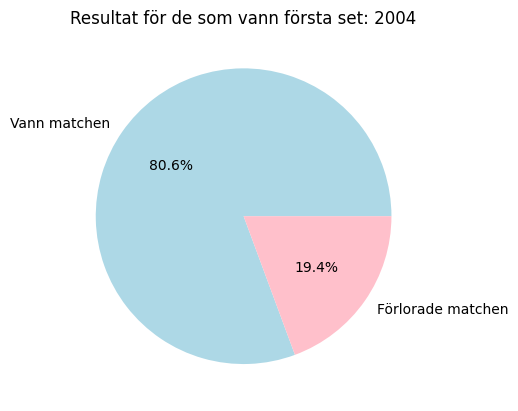

In [26]:
# Plotta cirkeldiagrammet
tennis_stockholm_2004['FirstSetWinnerWonMatch'] =  (tennis_stockholm_2004['FirstSetWinner'] == tennis_stockholm_2004['Result '])
counts = tennis_stockholm_2004['FirstSetWinnerWonMatch'].value_counts(normalize=True)
counts.plot(kind='pie', autopct='%1.1f%%', labels=['Vann matchen', 'Förlorade matchen'], colors=['lightblue', 'pink'])
plt.title('Resultat för de som vann första set: 2004')
plt.ylabel('')
plt.show()

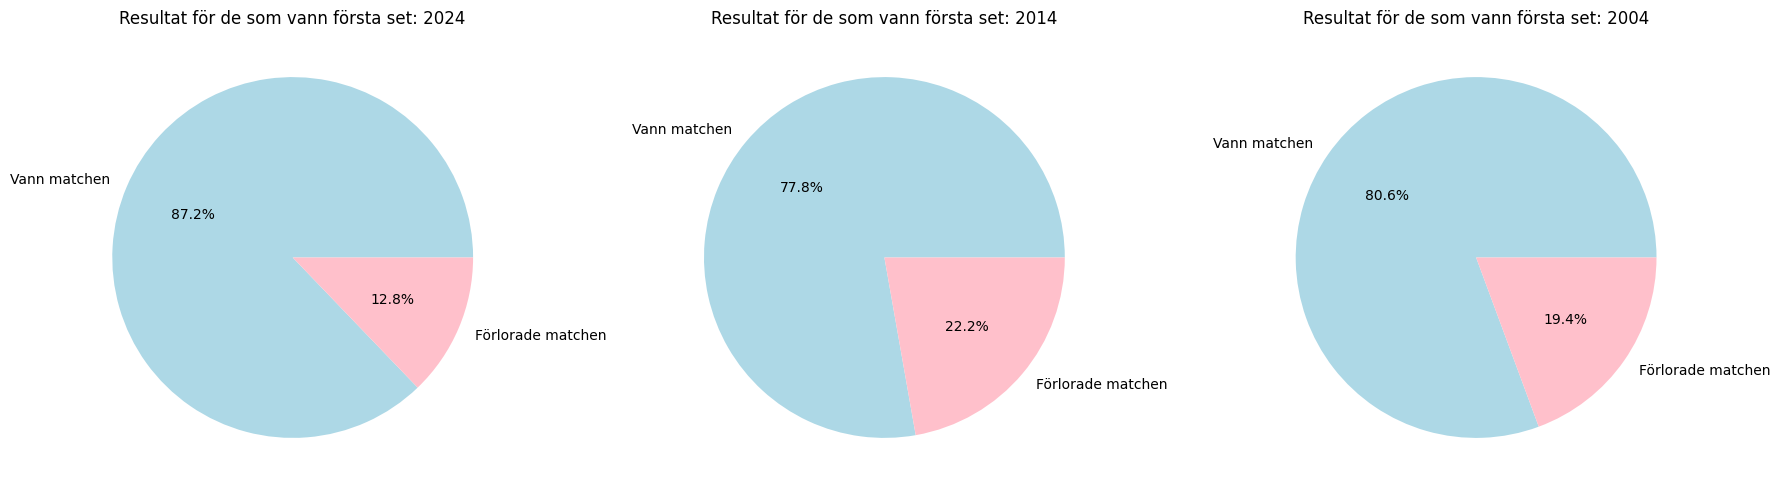

In [34]:
# Skapa subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 rad och 3 kolumner

# Diagram 1: Resultat 2024
tennis_stockholm['FirstSetWinnerWonMatch'] = (tennis_stockholm['FirstSetWinner'] == tennis_stockholm['Result '])
counts_2024 = tennis_stockholm['FirstSetWinnerWonMatch'].value_counts(normalize=True)
counts_2024.plot(kind='pie', autopct='%1.1f%%', labels=['Vann matchen', 'Förlorade matchen'], 
                 colors=['lightblue', 'pink'], ax=axes[0])
axes[0].set_title('Resultat för de som vann första set: 2024')
axes[0].set_ylabel('')

# Diagram 2: Resultat 2014
tennis_stockholm_2014['FirstSetWinnerWonMatch'] = (tennis_stockholm_2014['FirstSetWinner'] == tennis_stockholm_2014['Result '])
counts_2014 = tennis_stockholm_2014['FirstSetWinnerWonMatch'].value_counts(normalize=True)
counts_2014.plot(kind='pie', autopct='%1.1f%%', labels=['Vann matchen', 'Förlorade matchen'], 
                 colors=['lightblue', 'pink'], ax=axes[1])
axes[1].set_title('Resultat för de som vann första set: 2014')
axes[1].set_ylabel('')

# Diagram 3: Resultat 2004
tennis_stockholm_2004['FirstSetWinnerWonMatch'] = (tennis_stockholm_2004['FirstSetWinner'] == tennis_stockholm_2004['Result '])
counts_2004 = tennis_stockholm_2004['FirstSetWinnerWonMatch'].value_counts(normalize=True)
counts_2004.plot(kind='pie', autopct='%1.1f%%', labels=['Vann matchen', 'Förlorade matchen'], 
                 colors=['lightblue', 'pink'], ax=axes[2])
axes[2].set_title('Resultat för de som vann första set: 2004')
axes[2].set_ylabel('')

# Justera layout
plt.tight_layout()
plt.show()

**Kommentera:**

In [36]:
tennis_dallas = pd.read_csv("/Users/siljevik/tennis_dallas_2024.csv")
tennis_dallas.head(10)

,Professional,Tournament,Year,TournamentType,FirstSetWinner,Result
0,Terence Atmane,Dallas Open,2024,ATP 250,0.0,1.0
1,Thai-Son Kwiatkowski,Dallas Open,2024,ATP 250,1.0,0.0
2,Emilio Nava,Dallas Open,2024,ATP 250,1.0,1.0
3,Aidan Mayo,Dallas Open,2024,ATP 250,0.0,0.0
4,Nicolas Moreno De Alboran,Dallas Open,2024,ATP 250,1.0,1.0
5,Trevor Svajda,Dallas Open,2024,ATP 250,0.0,0.0
6,Tennys Sandgren,Dallas Open,2024,ATP 250,1.0,1.0
7,Sho Shimabukuro,Dallas Open,2024,ATP 250,0.0,0.0
8,Denis Kudla,Dallas Open,2024,ATP 250,1.0,1.0
9,Jerry Barton,Dallas Open,2024,ATP 250,0.0,0.0


In [37]:
# Filtrera för rader där FirstSetWinner är 1
first_set_winners = tennis_dallas[tennis_dallas['FirstSetWinner'] == 1].copy()

# Lägg till kolumnen
first_set_winners['FirstSetWinnerWonMatch'] = first_set_winners['FirstSetWinner'] == first_set_winners['Result ']

# Kontrollera distributionen
print("Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):")
print(first_set_winners['FirstSetWinnerWonMatch'].value_counts())

# Beräkna procentandelar
percentage = first_set_winners['FirstSetWinnerWonMatch'].value_counts(normalize=True) * 100

# Skriv ut resultaten
print("\nProcentandel för de som vann första set och också vann matchen:")
print(percentage)

Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):
FirstSetWinnerWonMatch
True     35
False     3
Name: count, dtype: int64

Procentandel för de som vann första set och också vann matchen:
FirstSetWinnerWonMatch
True     92.105263
False     7.894737
Name: proportion, dtype: float64


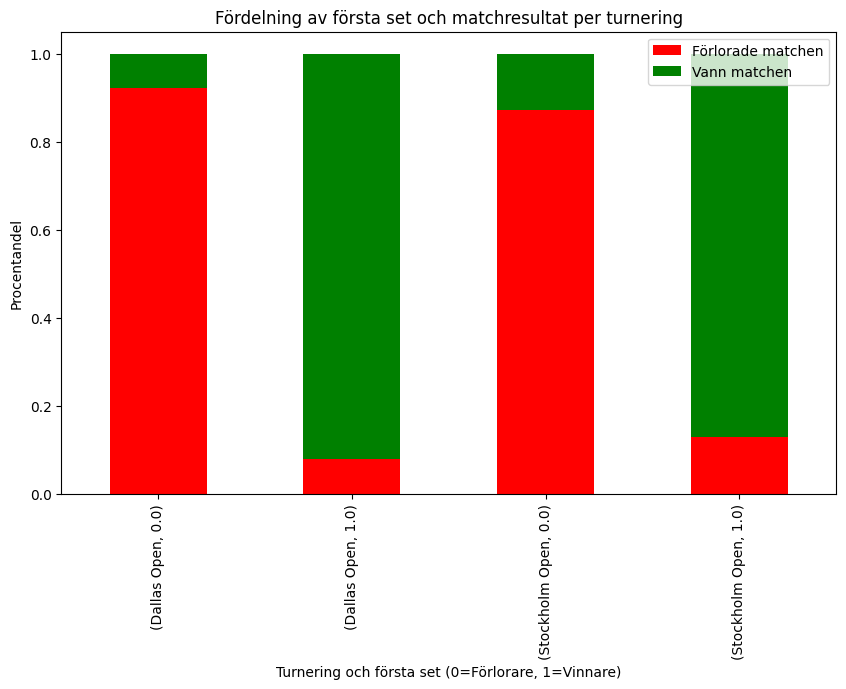

In [45]:
# Kombinera dataset
combined_data = pd.concat([tennis_dallas, tennis_stockholm], ignore_index=True)

# Grupperad analys 
grouped = combined_data.groupby(['Tournament', 'FirstSetWinner'])['Result '].value_counts(normalize=True).unstack()

# Plotta stackat stapeldiagram
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Fördelning av första set och matchresultat per turnering')
plt.ylabel('Procentandel')
plt.xlabel('Turnering och första set (0=Förlorare, 1=Vinnare)')
plt.legend(['Förlorade matchen', 'Vann matchen'])
plt.show()

**Kommentera:**

In [48]:
tennis_stockholm_junior = pd.read_csv("/Users/siljevik/tennis_stockholm_junior.csv")
tennis_stockholm_junior.head(10)

,Junior,Tournament,TournamentType,FirstSetWinner,Winner
0,OskariPaldanius,Pace salk open,J100,0,1
1,DamirZhalgasbay,Pace salk open,J100,1,1
2,EvanSimon,Pace salk open,J100,1,1
3,MaximilianCarrier,Pace salk open,J100,1,1
4,LudvigHede,Pace salk open,J100,1,1
5,EmilKindhult,Pace salk open,J100,1,1
6,ChristianGronfeldt-Sorensen,Pace salk open,J100,1,1
7,ArtemLyapshin,Pace salk open,J100,1,1
8,OleksandrPonomar,Pace salk open,J100,0,1
9,JinpengTang,Pace salk open,J100,0,1


In [51]:
first_set_winners = tennis_stockholm_junior[tennis_stockholm_junior['FirstSetWinner'] == 1].copy()

# Lägg till kolumnen
first_set_winners['FirstSetWinnerWonMatch'] = first_set_winners['FirstSetWinner'] == first_set_winners['Result ']

# Kontrollera distributionen
print("Sannolikheten att den som vinner första set också vinner matchen (endast för de som vann första set):")
print(first_set_winners['FirstSetWinnerWonMatch'].value_counts())

# Beräkna procentandelar
percentage = first_set_winners['FirstSetWinnerWonMatch'].value_counts(normalize=True) * 100

# Skriv ut resultaten
print("\nProcentandel för de som vann första set och också vann matchen:")
print(percentage)

KeyError: 'Result '

In [52]:
print(tennis_stockholm_junior.columns)

Index(['Junior', 'Tournament', 'TournamentType', 'FirstSetWinner', 'Winner'], dtype='object')
